In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
from myst_nb import glue
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

## Balance and Detailed Balance ##

The Markov chains that we have been studying have stationary distributions that contain much information about the behavior of the chain. The stationary distribution of a chain is the unique probability distribution that solves the balance equations. For some chains it is easy to identify a distribution that solves the balance equations. But for other chains, the solution can be complicated or tedious. 

In this section we will see where the term *balance* comes from, and identify a condition under which it is easy to solve the balance equations.

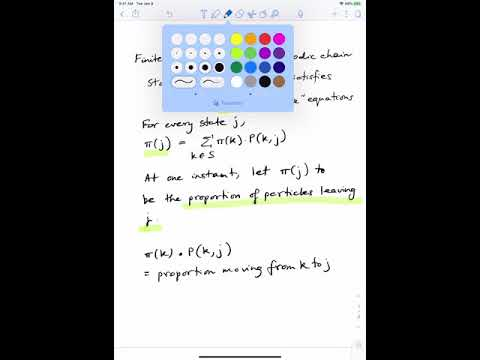

In [2]:
# VIDEO: Balance
from IPython.display import YouTubeVideo

vid_balance = YouTubeVideo('SfH-oJ-PTC4')
glue("vid_balance", vid_balance)

```{dropdown} See More
:icon: video
{glue:}`vid_balance`
```

### Balance ###

As before, assume that we have an irreducible, aperiodic Markov chain on a finite state space, with transition matrix $\mathbb{P}$. We have seen that such a chain has a unique stationary distribution $\pi$, and that $\pi$ solves the balance equations $\pi\mathbb{P} = \pi$.

To see what is being "balanced" in these equations, imagine a large number of independent replications of this chain. For example, imagine a large number of particles that are moving among the states 1 through 5 according to the transition probabilities of the sticky reflecting walk, and suppose all the particles are moving at instants 1, 2, 3, $\ldots$ independently of each other.

Then at any instant and for any state $j$, there is some proportion of particles that is leaving $j$, and another proportion that is entering $j$. The balance equations say that those two proportions are equal.

Let's check this by looking at the equations again. For each state $j$, the balance equation is

$$
\pi(j) = \sum_{k \in S} \pi(k)P(k, j)
$$

For every $k \in S$ (including $k=j$), think of $\pi(k)$ as the proportion of particles leaving state $k$ after the chain has been run a long time. 

- The left hand side is the proportion of particles leaving $j$. 
- The generic term in the sum on the right is the proportion of particles that left $k$ at the previous instant and are moving to $j$. The sum is the proportion of all the particles entering $j$. 

When the two sides are equal, the chain is *balanced*.  

### Detailed Balance ###

The left hand side of the equation above is just the proportion of particles leaving $j$. There is no information about where the particles are going. 

The *detailed balance* equations take both directions into account. They are given by

$$
\pi(i)P(i, j) = \pi(j)P(j, i) ~~~ \text{for all states } i \ne j
$$

The detailed balance equations say that for every pair of states $i$ and $j$, the proportion of particles that leave $i$ and move directly to $j$ is the same as the proportion that leave $j$ and move directly to $i$. 

In the case $i = j$ the two sides of the equation are identical and hence carry no information. So they are not included.

Detailed balance turns out to be a stronger condition than balance. 

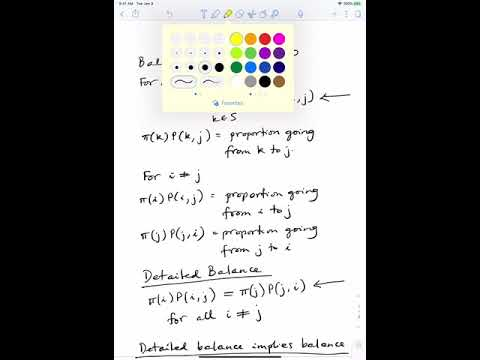

In [3]:
# VIDEO: Detailed Balance

vid_detailed_balance = YouTubeVideo('KEOTepEQCrU')
glue("vid_detailed_balance", vid_detailed_balance)

```{dropdown} See More
:icon: video
{glue:}`vid_detailed_balance`
```

### Detailed Balance Implies Balance ###

Suppose there is a probability distribution $\pi$ that solves the detailed balance equations. Then $\pi$ also solves the balance equations.

$$
\begin{align*}
\sum_{k \in S} \pi(k)P(k, j) &= \sum_{k \in S} \pi(j)P(j, k) ~~~ \text{(detailed balance)} \\
&= \pi(j) \sum_{k \in S} P(j, k) \\
&= \pi(j) \cdot 1 ~~~~~~~~~~~~~~ \text{(sum of }j\text{th row of transition matrix)} \\
&= \pi(j)
\end{align*}
$$

From now on, when we say "solution" we will mean a solution that is a probability distribution.

What we learn from this is that **if we can find a solution to the detailed balance equations, we will also have solved the balance equations**.

This is helpful for two reasons:

- The detailed balance equations are simple.
- There are lots of them; indeed if there are $s$ states then there are $\binom{s}{2}$ detailed balance equations in $s$ unknowns. This gives us lots of ways to try to solve them.

Of course all the $\binom{s}{2}$ equations need not be consistent, in which case there will no solution to the detailed balance equations. In such situations we'll have to slog our way through solving the balance equations directly. 

But there is an important class of Markov chains for which it is easy to see that the detailed balance equations must have a solution. Therefore for those chains we have an easy way at finding the stationary distribution.

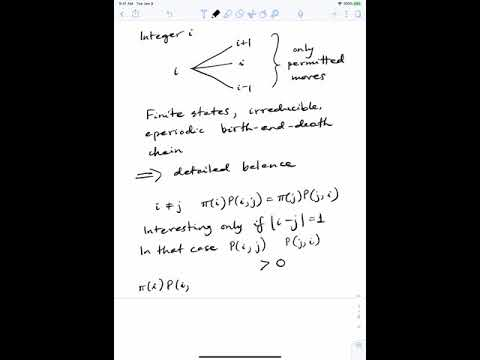

In [4]:
# VIDEO: Birth-and-Death Chains

vid_bod_chain = YouTubeVideo('CZNtQV5JpsU')
glue("vid_bod_chain", vid_bod_chain)

```{dropdown} See More
:icon: video
{glue:}`vid_bod_chain`
```

### Birth-and-Death Chains ###

A *birth-and-death chain* is a Markov chain on the integers, with one-step transitions restricted to going up by 1, going down by 1, or staying in place. A *birth* is a move up, and a *death* is a move down.

Such chains are used to model many different random quantities such as gamblers' fortunes or population sizes. Look through the chains you have worked with thus far. Many of them, including the sticky reflecting random walk and the Ehrenfest chain, are birth-and-death chains. In the Ehrenfest example, we were modeling the size of the population of gas particles in a container.

For all irreducible birth-and-death chains, the detailed balance equations have a solution. This is because the only possible moves are between consecutive integers, so the only detailed balance equations that have to be solved are

$$
\pi(i)P(i,j) = \pi(j)P(j, i), ~~~~~~~ \vert i - j \vert = 1
$$

For $i$ and $j$ separated by 1, both $P(i, j)$ and $P(j, i)$ are strictly positive because the birth-and-death chain is irreducible. For all other pairs $i \ne j$, the equation becomes $0 = 0$ because $P(i, j) = 0 = P(j, i)$.

Thus for example

$$
\pi(i)P(i, i+1) = \pi(i+1)P(i+1, i) ~~~~~ \text{so } \pi(i+1) = \pi(i)\frac{P(i, i+1)}{P(i+1,i)}
$$

This gives us an easy way to write each $\pi(j)$ in terms of the same element of $\pi$, and hence find $\pi$ as before.

We conclude the section with three examples of the use of detailed balance to find stationary distributions. 

- The first example revisits a simple chain we have studied before.
- Next we take another look at the Ehrenfest chain of the previous chapter. 
- The last example is one where the detailed balance equations don't have a solution but the chain still has a stationary distribution.

### Sticky Reflecting Walk Revisited ###

Recall the chain with transition diagram given by 

![sticky reflecting walk](trans_refl.png)

We noted earlier that this is an irreducible, aperiodic chain. We can see now that it is also a birth-and-death chain. So we can solve the detailed balance equations to get the stationary distribution.

Let's do this starting at the state 1.

$$
\begin{align*}
\pi(1)0.5 = \pi(2)0.25 &\implies \pi(2) = 2\pi(1) \\
\pi(2)0.25 = \pi(3)0.25 &\implies \pi(3) = \pi(2) = 2\pi(1) \\
\pi(3)0.25 = \pi(4)0.25 &\implies \pi(4) = \pi(3) = 2\pi(1) \\
\pi(4)0.25 = \pi(5)0.5 &\implies \pi(5) = (1/2)\pi(4) = \pi(1)
\end{align*}
$$

So $\pi = [\pi(1), 2\pi(1), 2\pi(1), 2\pi(1), \pi(1)]$.

Now use the fact that the probabilities have to sum to 1, to get $\pi(1) = 1/(1+2+2+2+1) = 1/8$. The stationary distribution is

$$
\pi = \big{[} \frac{1}{8}, \frac{2}{8}, \frac{2}{8}, \frac{2}{8}, \frac{1}{8} \big{]}
$$

as we have seen earlier numerically and also by solving the balance equations. The method used here is easier than both of those ways.

### Ehrenfest Chain Revisited ###
We have returned to this example because it is one where solving the balance equations involved some labor. But now we know the chain is a birth-and-death chain, so we can use the detailed balance equations to find the stationary distribution. 

[Recall](http://prob140.org/textbook/content/Chapter_10/04_Examples.html#a-diffusion-model-by-ehrenfest) the transition rules:

- At each step, select one of the $N$ particles at random and place it into one of the two containers at random; the chain counts the number of particles in Container 1.

We therefore have an irreducible birth-and-death chain with the transition probabilities we calculated earlier:

$$
P(i, j) = 
\begin{cases} 
\frac{N-i}{2N} & \text{if } j = i+1 \\
\frac{1}{2} & \text{if } j = i \\
\frac{i}{2N} & \text{if } j = i-1 \\
0 & \text{otherwise}
\end{cases}
$$

The detailed balance equations are easy to solve sequentially starting at the state $j=0$.

$$
\begin{align*}
\pi(0)\frac{1}{2} &= \pi(1)\frac{1}{2N} ~~ \implies ~~ \pi(1) = N\pi(0)
= \binom{N}{1}\pi(0) \\ \\
\pi(1)\frac{N-1}{2N} &= \pi(2)\frac{2}{2N} ~~ \implies ~~ \pi(2) = \frac{N-1}{2}\pi(1) = \frac{N(N-1)}{2}\pi(0) = \binom{N}{2}\pi(0) \\ \\
\pi(2)\frac{N-2}{2N} &= \pi(3)\frac{3}{2N} ~~ \implies ~~ \pi(3) = \frac{N-2}{3}\pi(2) = \frac{N(N-1)(N-2)}{3\cdot 2} \pi(0) = \binom{N}{3}\pi(0)
\end{align*}
$$

and so on, so that for $1 \le k \le N$,

$$
\pi(k) = \binom{N}{k} \pi(0)
$$

by a far quicker calculation than the one we did to solve the balance equations. 

At this point the calculation is the [same as before](http://prob140.org/textbook/content/Chapter_10/04_Examples.html#a-diffusion-model-by-ehrenfest): the terms have to add up to 1, which leads to $\pi(0) = 2^{-N}$ and therefore the stationary distribution is binomial $(N, 1/2)$.

It is worth remembering that for numerical value of $N$ you can just use `steady_state` to find the stationary distribution, relying on Python to do all the work for you. This has some clear advantages but also some disadvantages:

- Python will not be able to handle the computation when $N$ is very large.
- You will either not see that the distribution is just binomial or will see it and not know why.

These are reasons why, even in the age of powerful personal computers, it is still important to find good ways of solving problems using math.

### Sticky Random Walk on a Circle ###

Suppose a chain has states 0, 1, 2, 3, 4 arranged in sequence clockwise on a circle. Suppose that at each step the chain stays in place with probability $s > 0$, moves to its counterclockwise neighbor with probability $p$, and to its clockwise neighbor with probability $r$. Here $s$, $p$, and $r$ are strictly positive and sum to 1. 

The chain is irreducible and aperiodic. It is clear that the behavior of the chain is symmetric in the five states, and therefore in the long run it is expected to spend the same proportion of time in each state. 

**The stationary distribution is therefore uniform on the states**. You can also check this by solving the balance equations.

Unlike the chains above, this chain can "loop back around." It can move from state 4 to state 1. So it's not a birth-and-death chain, and it's not clear that the detailed balance equations are consistent.

Let's try to solve them and see what happens. The detailed balance equations are:

$$
\begin{align*}
\pi(0)r = \pi(1)p ~~~~ \implies \pi(1) = \frac{r}{p}\pi(0) \\ 
\pi(1)r = \pi(2)p ~~~~ \implies \pi(2) = \frac{r^2}{p^2}\pi(0) \\ 
\pi(2)r = \pi(3)p ~~~~ \implies \pi(3) = \frac{r^3}{p^3}\pi(0) \\ 
\pi(3)r = \pi(4)p ~~~~ \implies \pi(4) = \frac{r^4}{p^4}\pi(0) 
\end{align*}
$$

So far so good, but now for the moment of truth:

$$
\pi(4)r = \pi(0)p ~~~~ \implies \pi(4) = \frac{p}{r}\pi(0)
$$

For this system of equations to be consistent and have a positive solution, the two expressions for $\pi(4)$ must be equal, which is equivalent to

$$
\frac{r^4}{p^4} = \frac{p}{r}, ~~~ \text{that is, } ~r^5 = p^5
$$

This can only happen if $r = p$, and in that case the detailed balance equations say that all the entries of $\pi$ are equal, which we already knew.

To summarize:

- For all values of $r$ and $p$, the stationary distribution of the chain is uniform on all the states. The uniform distribution satisfies the balance equations.
- When $r = p$, the detailed balance equations have a positive solution which is the stationary distribution.
- When $r \ne p$ the detailed balance equations have no solution that is a probability distribution. However, the stationary distribution exists as described above.